In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cityblock, pdist
import itertools

In [93]:
file = "test.dat"
# file = "day.dat"
lines = open(file,'r').read().split('\n') 
raw_sky = np.array([list(line) for line in lines]) # np row major
sky = np.insert(raw_sky, np.where(np.all(raw_sky == '.', axis=1))[0], np.full((1,raw_sky.shape[1]),'.'), axis=0)
sky = np.insert(sky, np.where(np.all(sky == '.', axis=0))[0], np.full((sky.shape[0],1),'.'), axis=1)
galaxies = np.argwhere(sky == '#')  # find # in sky
distances = pdist(galaxies, metric='cityblock')
# test answer is 374
# answer is 9214785
int(np.sum(distances))

374

Part 2

This is what the expansion should do to the galaxies list. For expansion factor 1.

| is    | to   |
|-------|------|
| [0 3] | [0 4] |
| [1 7] | [1 9] |
| [2 0] | [2 0] |
| [4 6] | [5 8] | 
| [5 1] | [6 1] |
| [6 9] | [7 12]| 
| [8 7] | [10 9]|
| [9 0] | [11 0]|
| [9 4] | [11 5]|

In [158]:
# file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n')
expansion = 1000000
sky = np.array([list(line) for line in lines]) # np row major
galaxies = np.argwhere(sky == '#') # find # in sky
empty_rows, empty_cols = np.where(np.all(sky == '.', axis=1))[0], np.where(np.all(sky == '.', axis=0))[0]
row_inc, col_inc = np.searchsorted(empty_rows, galaxies[:,0]), np.searchsorted(empty_cols, galaxies[:,1])
galaxies[:,0] += row_inc*(expansion-1)
galaxies[:,1] += col_inc*(expansion-1)
distances = pdist(galaxies, metric='cityblock')
# 10 expansion test answer is 1030
# 100 expansion test answer is 8410
# answer is 613686987427
int(np.sum(distances))

613686987427

In [78]:
# print("0123456789012")
# for row in range(sky.shape[0]):
#     for col in range(sky.shape[1]):
#         print(sky[row,col],end='')
#     print()

# print()
# print("0123456789012")
# print("....#........" == (''.join(sky[0,:].tolist())))
# print(".........#..." == (''.join(sky[1,:].tolist())))
# print("#............" == (''.join(sky[2,:].tolist())))
# print("............." == (''.join(sky[3,:].tolist())))
# print("............." == (''.join(sky[4,:].tolist())))
# print("........#...." == (''.join(sky[5,:].tolist())))
# print(".#..........." == (''.join(sky[6,:].tolist())))
# print("............#" == (''.join(sky[7,:].tolist())))
# print("............." == (''.join(sky[8,:].tolist())))
# print("............." == (''.join(sky[9,:].tolist())))
# print(".........#..." == (''.join(sky[10,:].tolist())))
# print("#....#......." == (''.join(sky[11,:].tolist())))


In [159]:
G = nx.Graph()
galaxy_nodes = tuple(tuple(x) for x in galaxies.tolist())
for node_coords in galaxy_nodes:
    u, v = node_coords
    x, y = v, sky.shape[0]-u
    G.add_node(node_coords, pos=(x, y))

for i in range(len(galaxy_nodes) - 1):
    for j in range(i + 1, len(galaxy_nodes)):
        weight = distances[i+j]
        G.add_edge(galaxy_nodes[i], galaxy_nodes[j], weight=weight)


mst = nx.minimum_spanning_tree(G)

In [168]:
print("Number of edges in MST:", len(mst.edges()))
print("Number of edges in G:", len(G.edges()))

Number of edges in MST: 425
Number of edges in G: 90525


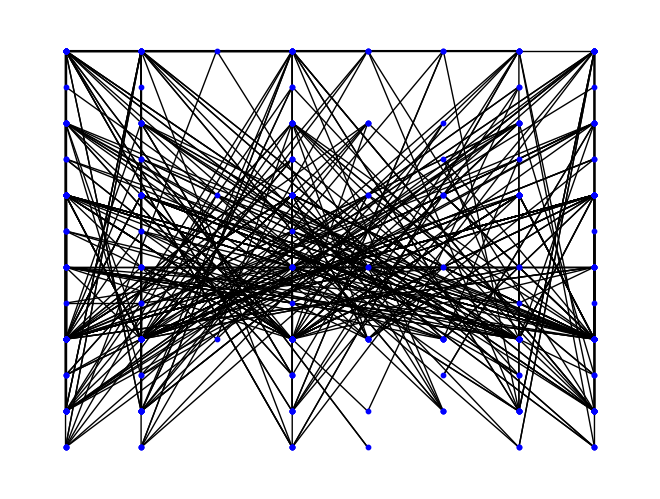

<Figure size 14000x14000 with 0 Axes>

In [169]:
# draw graph with labels on weighted edges
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels)

# nx.draw(G, pos, node_color='blue', node_size=1, with_labels=False)
nx.draw(mst, pos, node_color='blue', node_size=10, with_labels=False)

figsize = (sky.shape[1], sky.shape[0])
plt.figure(figsize=figsize)
plt.show()